In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [6]:
train = open('/Users/avishekhimanshu/Downloads/EMotion/train.txt','r')
lis_train = train.readlines()

In [29]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC,LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [10]:
xx = lis_train[0]
non = xx.strip()
sentence = non.split(';')[0]
emotion = non.split(';')[1]
emotion

'sadness'

In [11]:
sentences = []
emotions = []
for i in lis_train:
    non  = i.strip()
    sentence = non.split(';')[0]
    emotion = non.split(';')[1]
    sentences.append(sentence)
    emotions.append(emotion)

In [15]:
data_tuples = list(zip(emotions,sentences))
one_df = pd.DataFrame(data=data_tuples,columns=['Emotion','Sentence'])

In [18]:
two_df = pd.read_csv('/Users/avishekhimanshu/Downloads/emotions.csv')
two_df.columns = ['g','Emotion','Sentence']

In [19]:
two_df.drop('g',axis=1,inplace=True)

In [20]:
one_df

,Emotion,Sentence
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,anger,i am feeling grouchy
...,...,...
15995,sadness,i just had a very brief time in the beanbag an...
15996,sadness,i am now turning and i feel pathetic that i am...
15997,joy,i feel strong and good overall
15998,anger,i feel like this was such a rude comment and i...


In [22]:
df = pd.concat([one_df,two_df])

In [25]:
df.drop_duplicates(inplace=True)

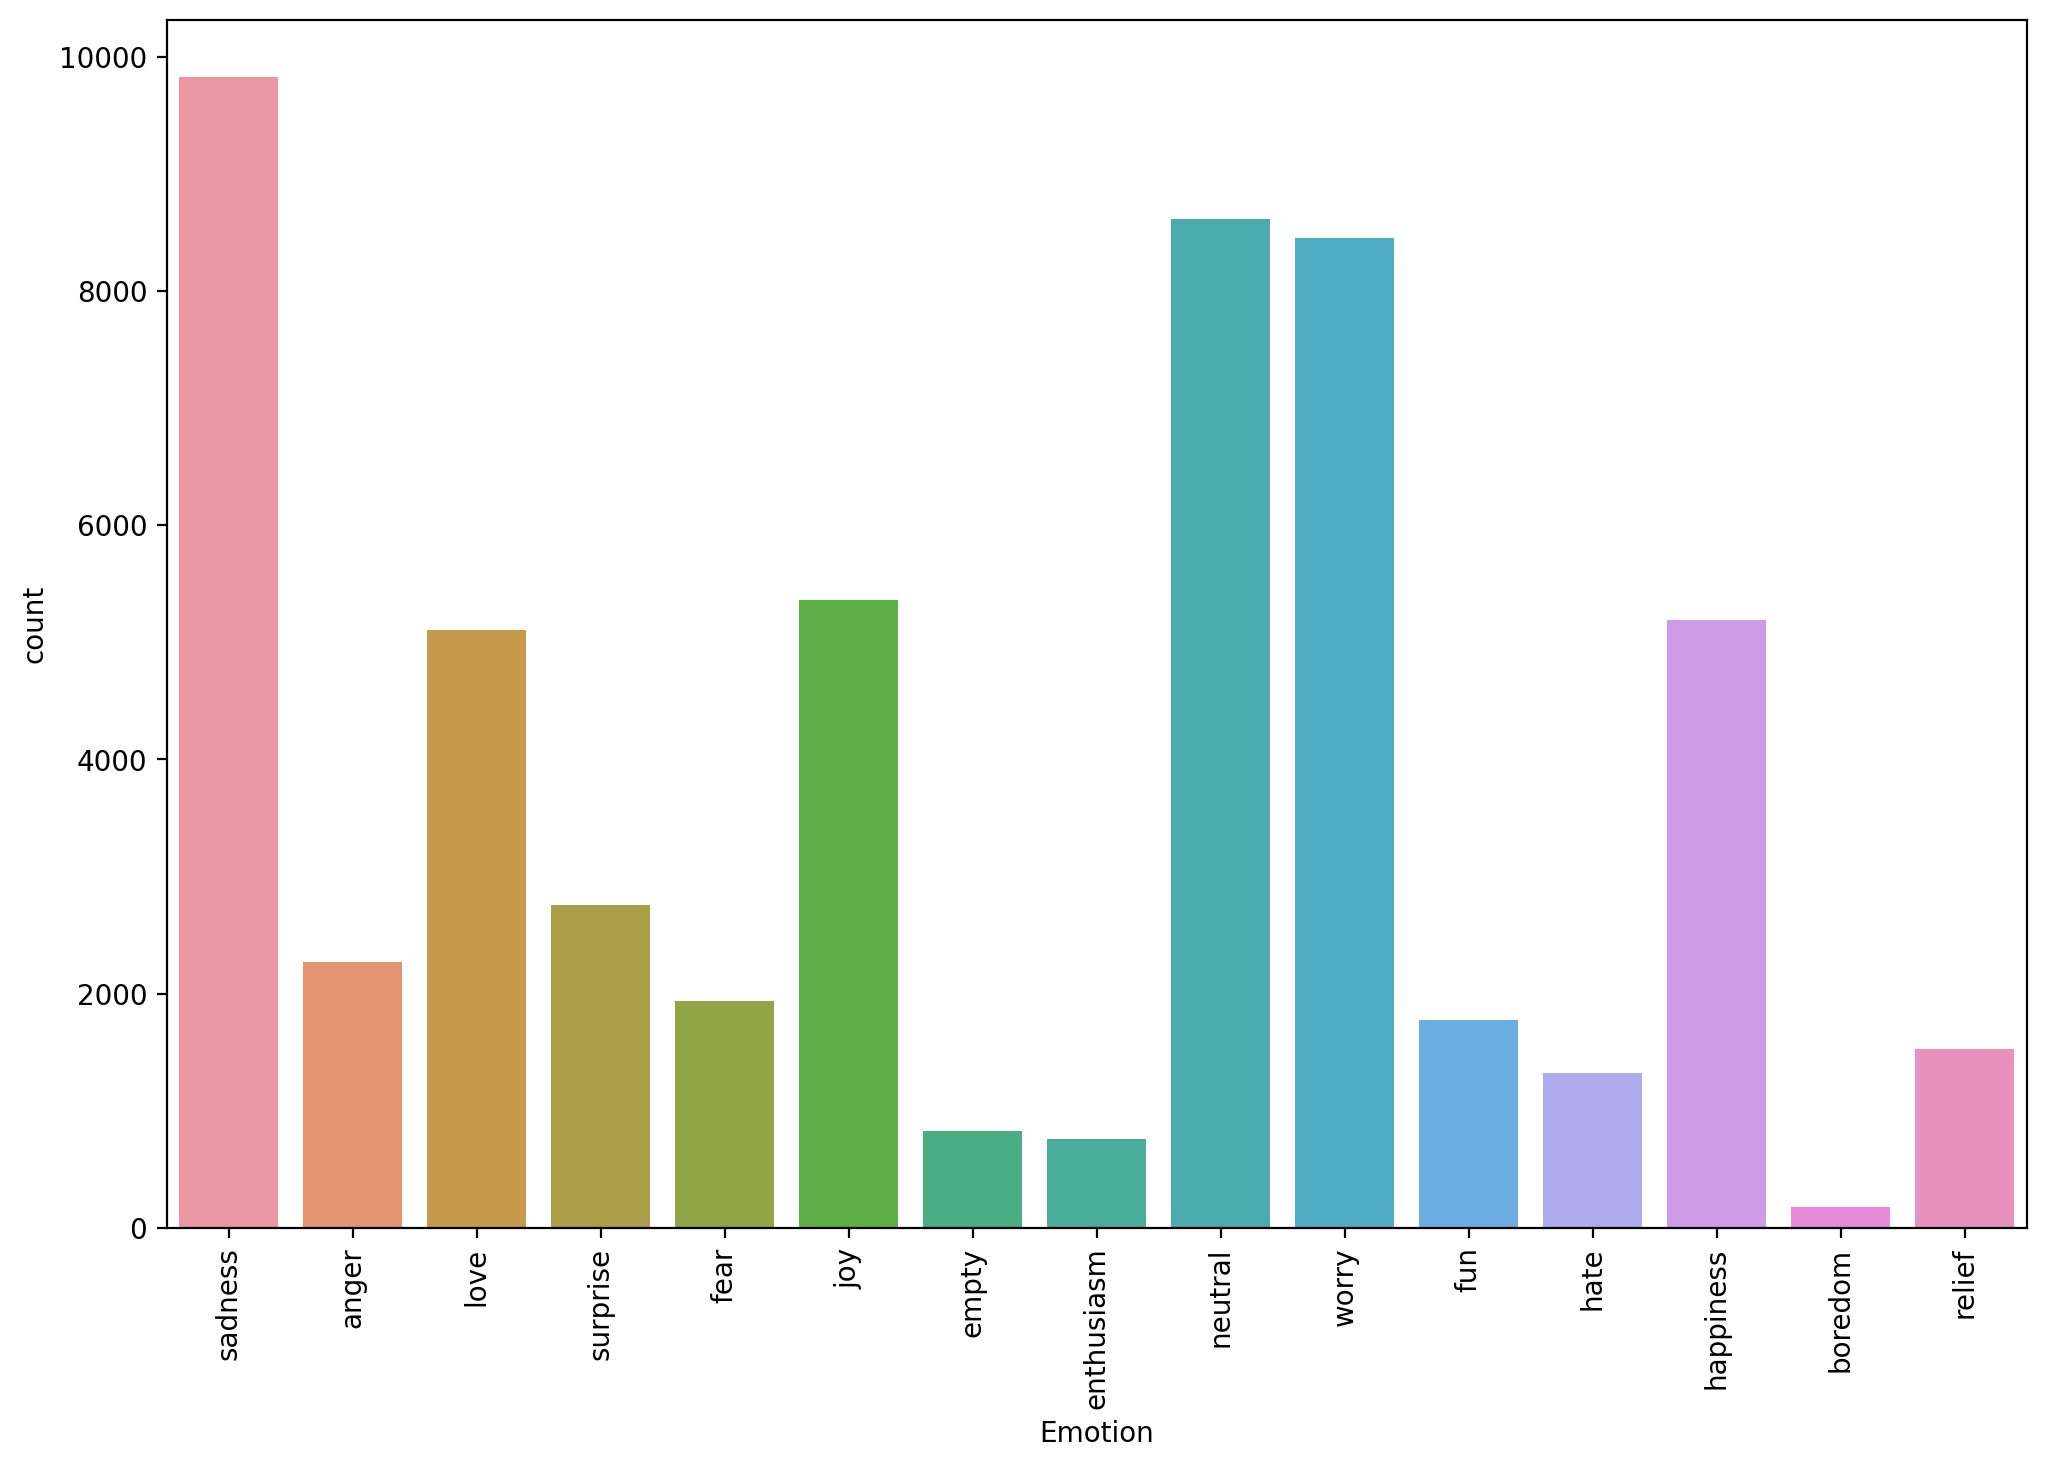

In [28]:
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(data=df,x='Emotion')
plt.xticks(rotation=90);

In [30]:
X = df['Sentence']
y = df['Emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=101)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55908 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotion   55908 non-null  object
 1   Sentence  55908 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [33]:
df[df['Sentence'].str.isspace()]

,Emotion,Sentence


In [34]:
tv = TfidfVectorizer(stop_words='english',)
tv.fit(X_train)
X_train = tv.transform(X_train)
X_test = tv.transform(X_test)

In [35]:
model = SVC(probability=True)
model.fit(X_train,y_train)

SVC(probability=True)

In [36]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))

In [55]:
pipe = Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),('svc',SVC(kernel='rbf',gamma=1.2))])

In [56]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('svc', SVC(gamma=1.2))])

In [57]:
from joblib import load,dump
dump(pipe,'EmotionalGuess.joblib')

['EmotionalGuess.joblib']

In [65]:
xx= input('Input: ')
pipe.predict([xx])

Input: T feel really depressed right now. Nothing's going right in my life.Cheer up! Things can t be that bad!


array(['sadness'], dtype=object)